# IMDB : Top 10000 Movies

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Reading the Data

In [2]:
names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
data = pd.read_csv('imdb_top_10000.txt', delimiter='\t', names=names).dropna()
data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


## Exploratory Data Analysis

Removing The year from the title and the 'mins' from runtime.

In [3]:
data['runtime'] = data['runtime'].apply(lambda x: int(x[0:3]))
data['title'] = data['title'].apply(lambda x:x[:-7])

In [4]:
data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


In [5]:
genres = set()
for m in data.genres:
    genres.update(g for g in m.split('|'))
genres = sorted(genres)

genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [9]:
for genre in genres:
    data[genre] = [genre in movie.split('|') for movie in data.genres]
         
data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,...
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,...
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,...
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,...
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,...


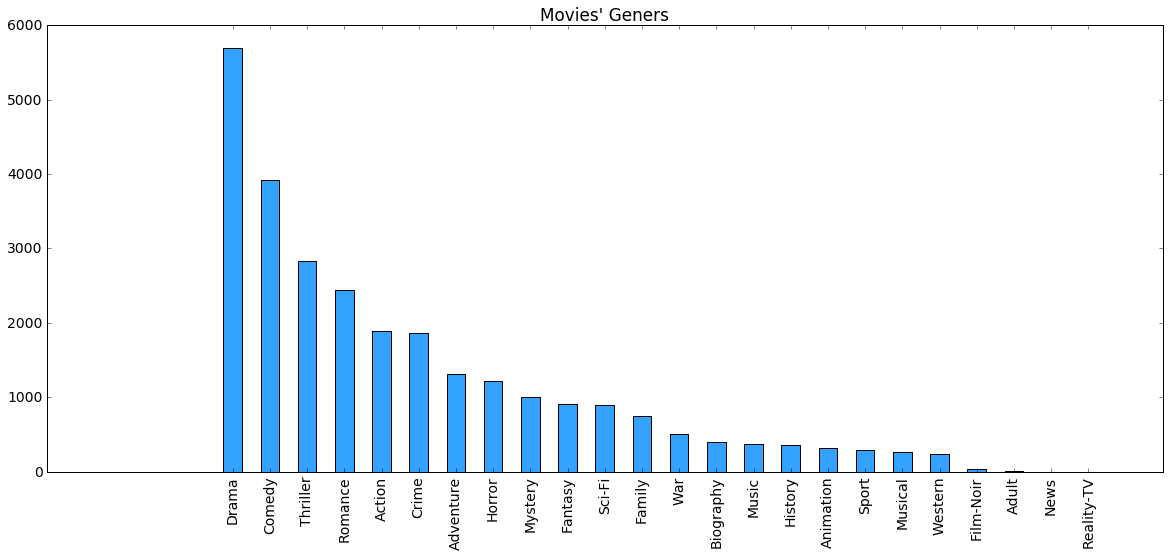

In [62]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 14

movies_count = data[genres].sum()

movies_count.sort(ascending=False)
movies_count_data  = movies_count.tolist()
movies_count_labels = movies_count.keys().get_values()

plt.bar(list(xrange(len(movies_count_data))),movies_count_data,0.5, color='#33A2FF', align='center')
plt.title('Movies\' Geners')
ticks = plt.xticks(list(xrange(len(movies_count_data))), movies_count_labels,rotation='vertical')

Exploring Most popular and Most hated movies

In [34]:
data[(data.votes==data.votes.max()) |(data.score == data.score.max())]

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,...
26,tt0068646,The Godfather,1972,9.2,474189,175,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,...


In [35]:
data[(data.votes==data.votes.min()) |(data.score == data.score.min())]

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,
1982,tt0060666,Manos: The Hands of Fate,1966,1.5,20927,74,Horror,False,False,False,False,False,False,False,False,False,False,False,False,True,...
2793,tt0270846,Superbabies: Baby Geniuses 2,2004,1.5,13196,88,Comedy|Family,False,False,False,False,False,True,False,False,True,False,False,False,False,...
3746,tt0421051,Daniel the Wizard,2004,1.5,8271,81,Comedy|Crime|Family|Fantasy|Horror,False,False,False,False,False,True,True,False,True,True,False,False,True,...
5158,tt0364986,Ben & Arthur,2002,1.5,4675,85,Drama|Romance,False,False,False,False,False,False,False,True,False,False,False,False,False,...
5993,tt0060753,Night Train to Mundo Fine,1966,1.5,3542,89,Action|Adventure|Crime|War,True,False,True,False,False,False,True,False,False,False,False,False,False,...
6257,tt0059464,Monster a-Go Go,1965,1.5,3255,70,Sci-Fi|Horror,False,False,False,False,False,False,False,False,False,False,False,False,True,...
6726,tt1309000,Dream Well,2009,1.5,2848,0,Comedy|Romance|Sport,False,False,False,False,False,True,False,False,False,False,False,False,False,...
9973,tt0878674,Garage,2007,6.9,1356,0,Drama,False,False,False,False,False,False,False,True,False,False,False,False,False,...
9974,tt0076391,Mimino,1977,8.2,1356,97,Comedy,False,False,False,False,False,True,False,False,False,False,False,False,False,...
9997,tt0060880,The Quiller Memorandum,1966,6.5,1356,104,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,...


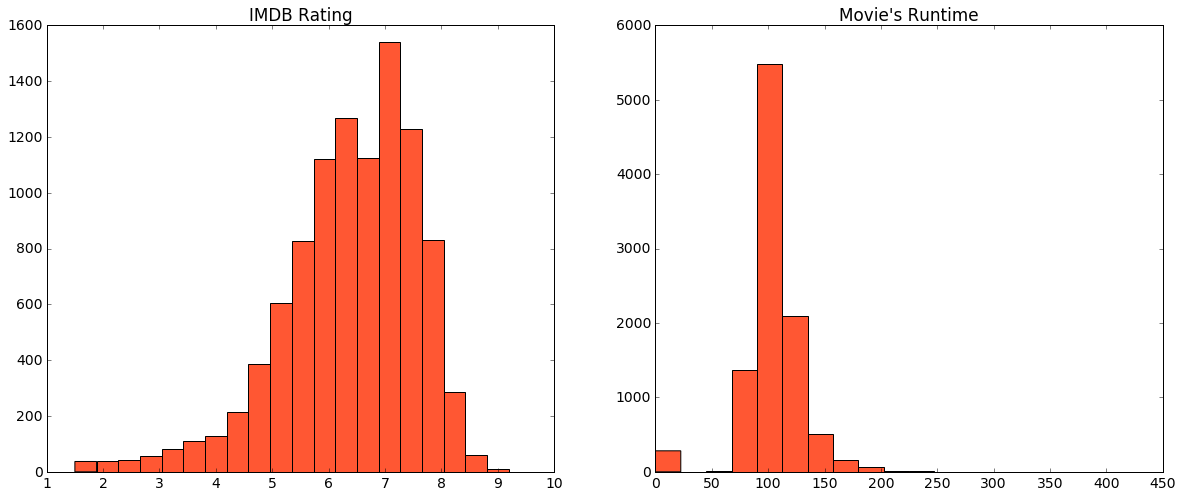

In [65]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 14

plt.subplot(121)
plt.hist(data.score, bins=20, color='#FF5733')
plt.title("IMDB Rating")

plt.subplot(122)
plt.hist(data.runtime, bins=20, color='#FF5733')
plot = plt.title("Movie's Runtime")


In [39]:
print data.year.min()
print data.year.max()

1950
2011


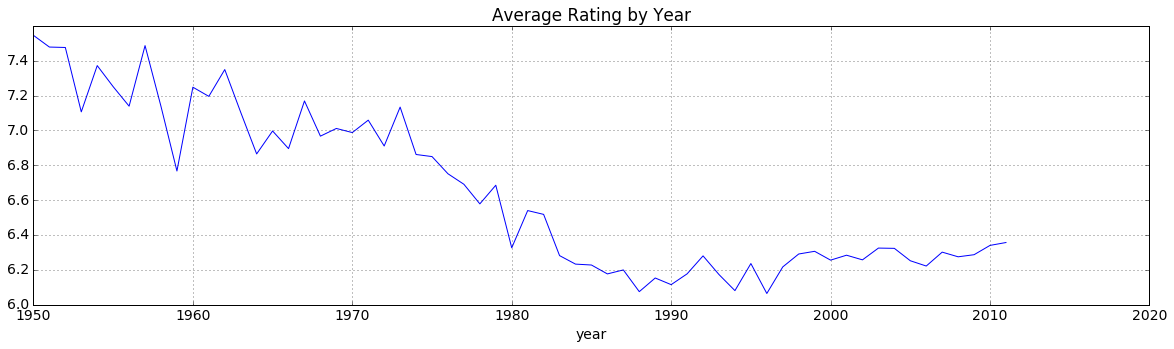

In [56]:
plot  = data.groupby('year').score.mean().plot()
plot = plt.title('Average Rating by Year')

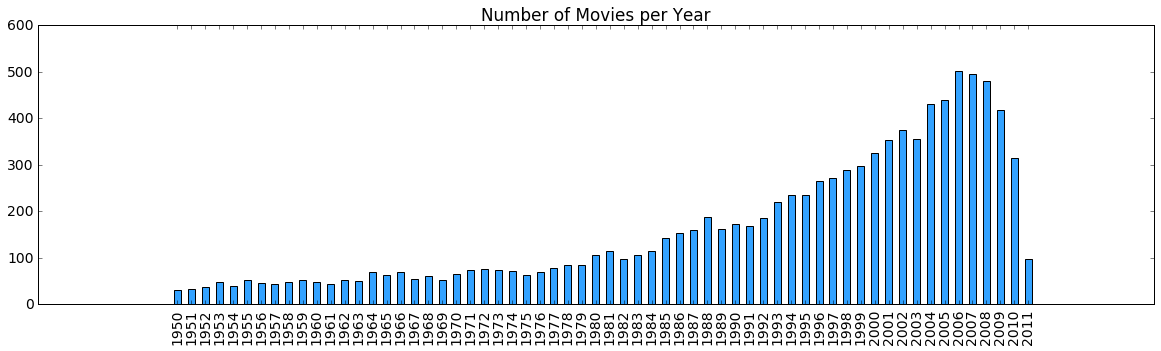

In [57]:
year_frame = data[['year','title']].groupby('year').agg('count')
year_data = year_frame['title']
year_data =  year_data.tolist()
year_labels = year_frame['year'].keys().get_values()

plt.bar(list(xrange(len(year_data))),year_data,0.5, color='#33A2FF', align='center')
plt.title('Number of Movies per Year')
ticks = plt.xticks(list(xrange(len(year_labels))), year_labels,rotation='vertical')

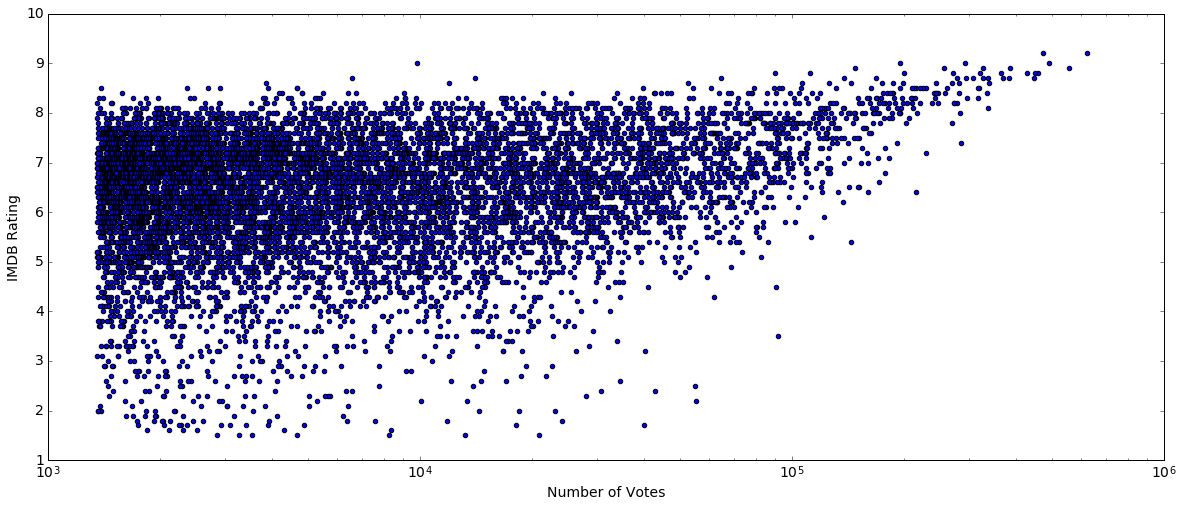

In [71]:
plt.scatter(data.votes, data.score)
plt.xlabel("Number of Votes")
plt.ylabel("IMDB Rating")
plot = plt.xscale('log')


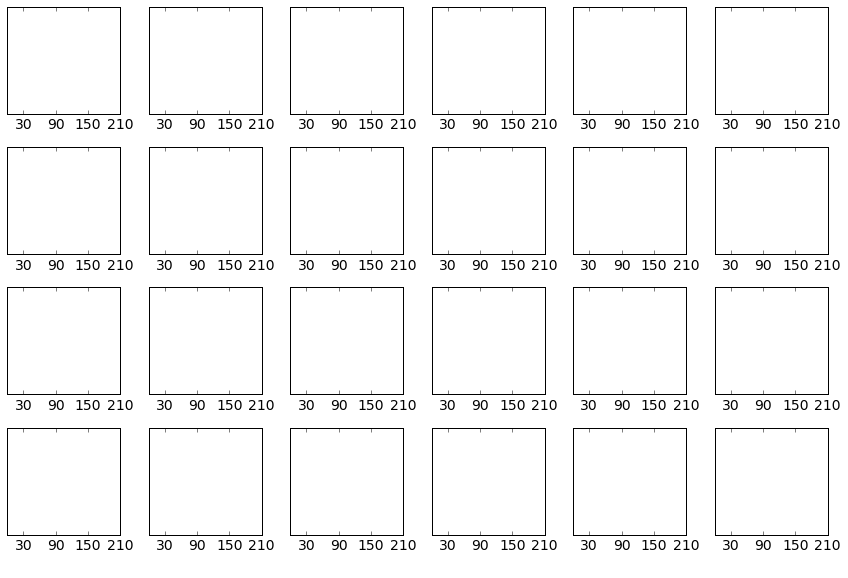

In [108]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8), tight_layout=True)

bins = np.arange(30, 240, 10)

for ax, genre in zip(axes.ravel(), genres):
    
    ax.hist(data[data[genre] == 1].score, bins=bins, normed=True, color='#FF5733',
            zorder=0)
    
    ax.set_xticks(np.arange(30, 240, 60))
    ax.set_yticks([])
    ax.annotate(genre, xy=(230, .02), ha='right', fontsize=12)

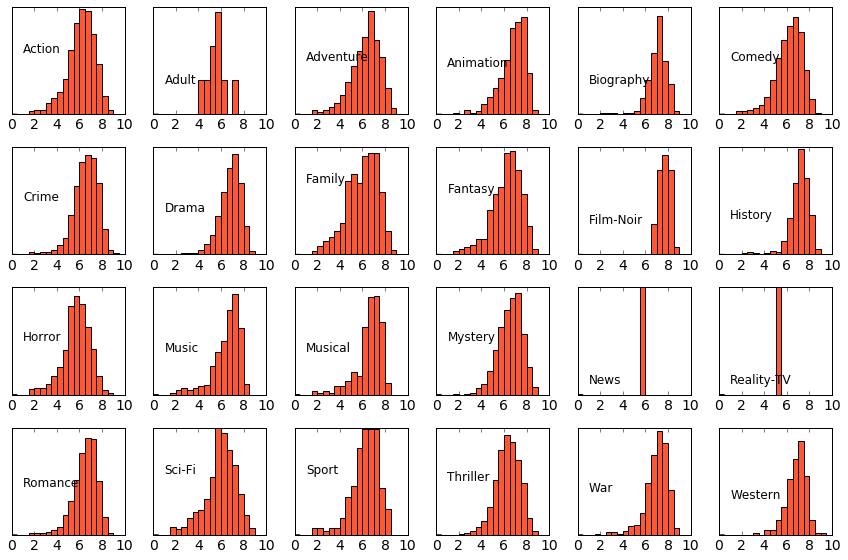

In [123]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8), tight_layout=True)

bins = np.arange(0, 10, .5)

for ax, genre in zip(axes.ravel(), genres):
    ax.hist(data[data[genre] == 1].score,bins = bins,normed=True, color='#FF5733')
    
    ax.set_yticks([])
    ax.annotate(genre, xy=(1, 0.2), ha='left', fontsize=12)

## Clustering

In [125]:
data = data.drop(['imdbID','genres'],axis=1)
data.head()

,title,year,score,votes,runtime,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,
0,The Shawshank Redemption,1994,9.2,619479,142,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,...
1,Pulp Fiction,1994,9.0,490065,154,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...
2,Fight Club,1999,8.8,458173,139,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...
3,The Matrix,1999,8.7,448114,136,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...
4,Inception,2010,8.9,385149,148,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...


In [126]:
data_ml = data.drop('title',axis=1).values

from sklearn import cross_validation
train_data, test_data =cross_validation.train_test_split(data_ml, test_size=0.2, random_state=0)

In [153]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=10, algorithm='kd_tree').fit(data_ml)

In [154]:
result_graph = model.kneighbors_graph(data_ml).toarray()
listy = result_graph[data[data['title'] == 'The Lord of the Rings: The Fellowship of the Ring'].index.tolist()]
nbrs_list  = [i for i, x in enumerate(listy[0]) if x == 1]
data.iloc[nbrs_list]

,title,year,score,votes,runtime,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,
1,Pulp Fiction,1994,9.0,490065,154,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...
2,Fight Club,1999,8.8,458173,139,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...
3,The Matrix,1999,8.7,448114,136,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...
4,Inception,2010,8.9,385149,148,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...
5,Forrest Gump,1994,8.7,368994,142,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,...
26,The Godfather,1972,9.2,474189,175,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,...
27,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,451263,178,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,...
28,The Lord of the Rings: The Return of the King,2003,8.8,428791,201,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,...
29,The Lord of the Rings: The Two Towers,2002,8.7,383113,179,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,...
30,Star Wars: Episode IV - A New Hope,1977,8.8,364211,121,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,...
